# Uninformed search

# **Tree**

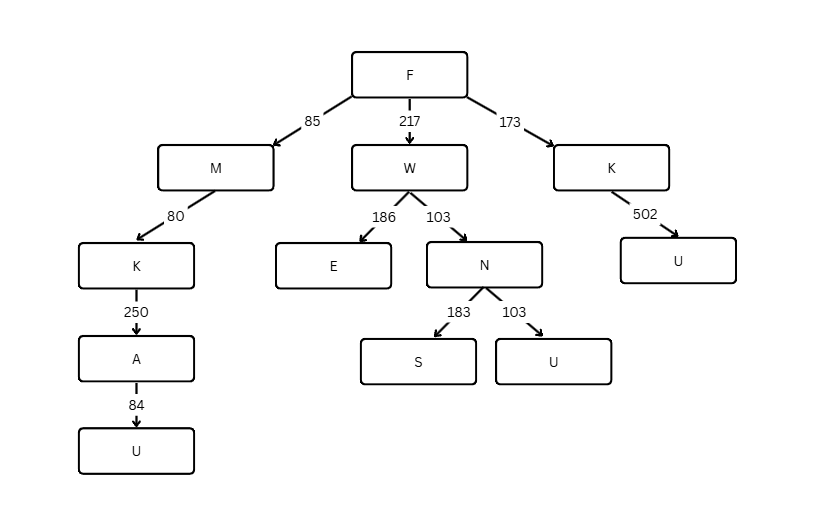

## Breadth First Search

https://favtutor.com/blogs/breadth-first-search-python#:~:text=Breadth%2DFirst%20Search%20is%20a,graph%20is%20almost%20the%20same.

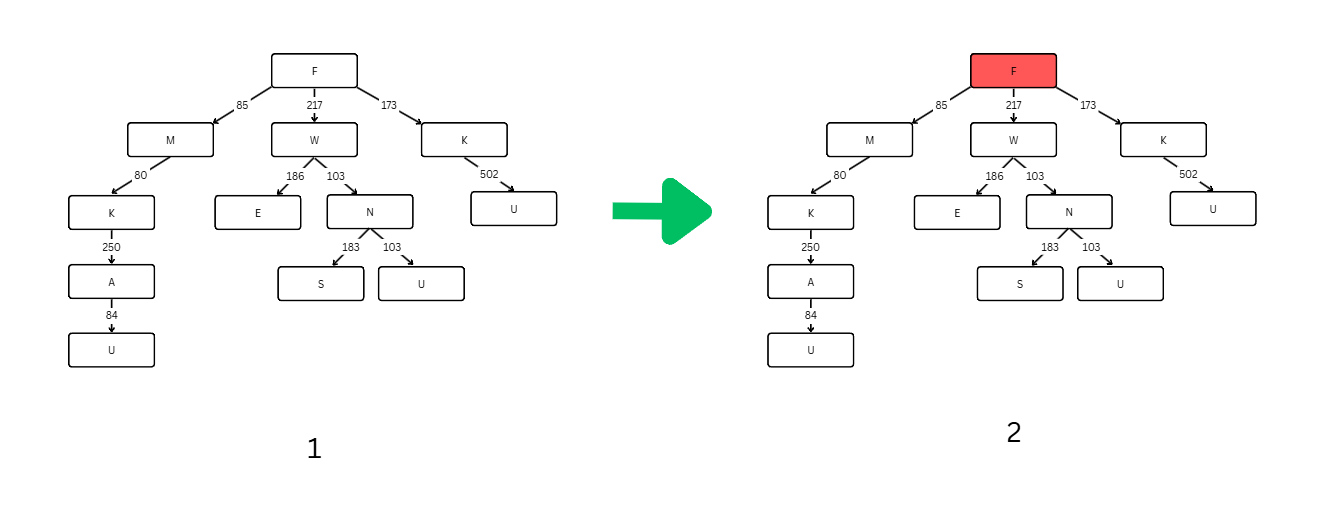

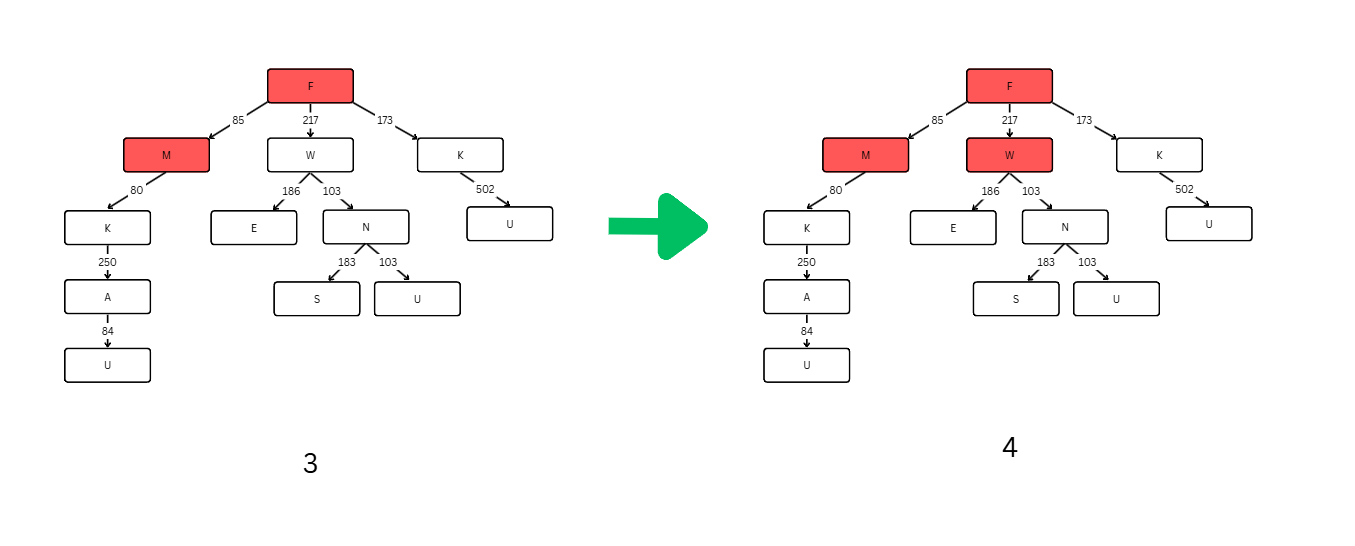

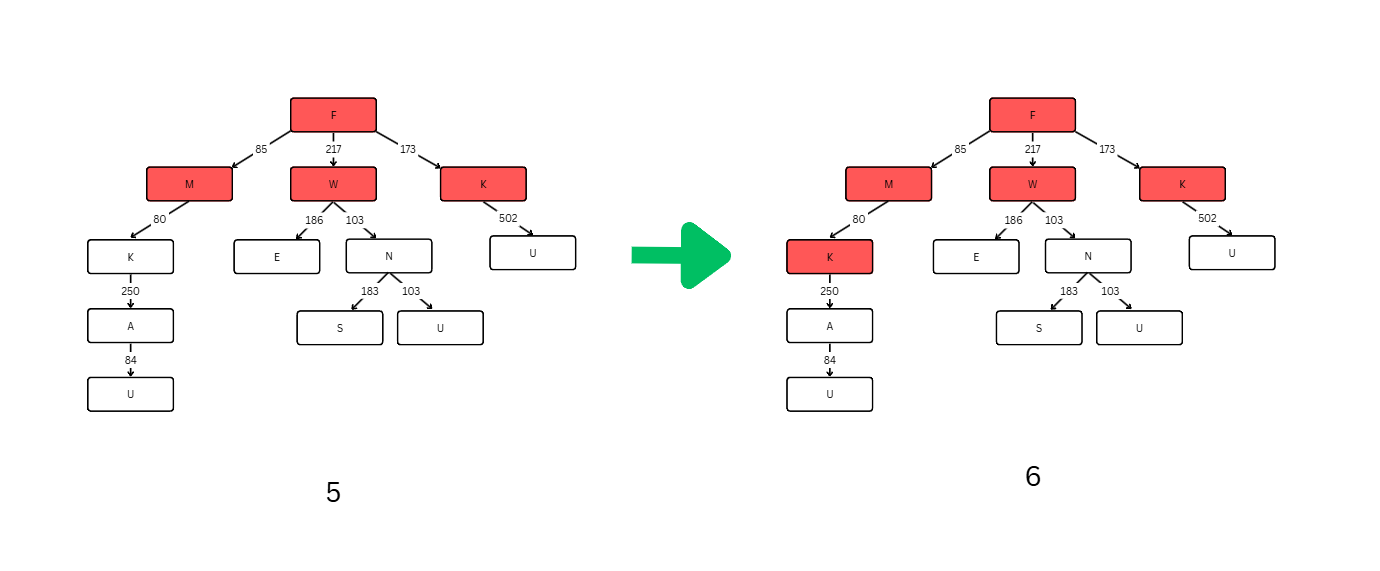

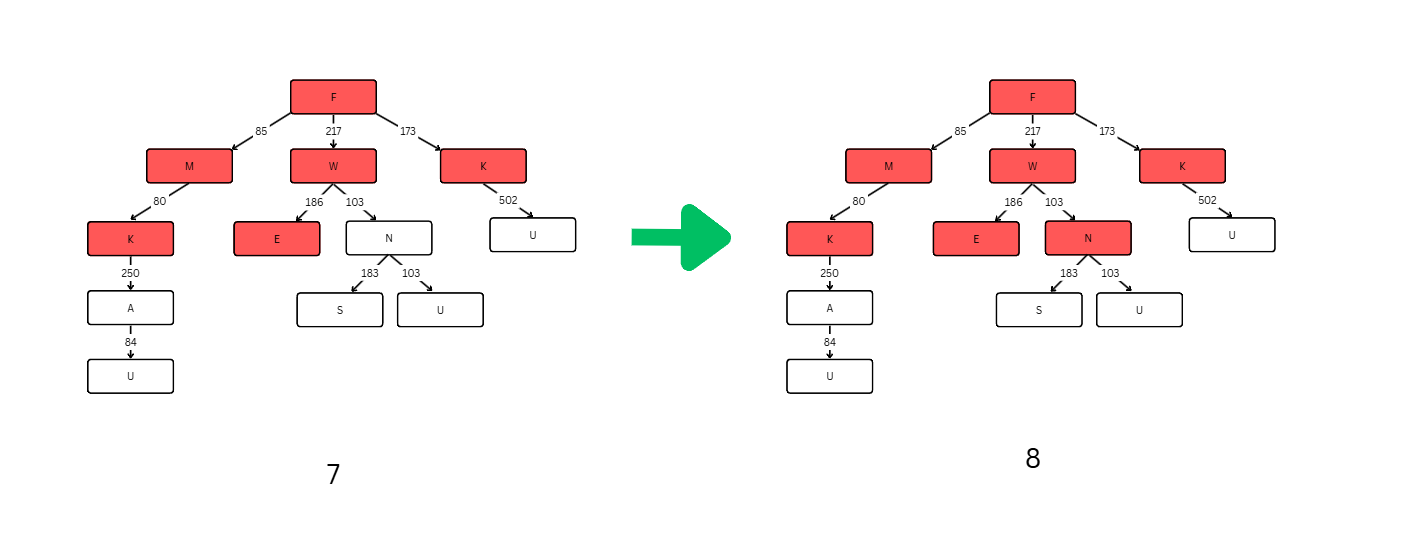

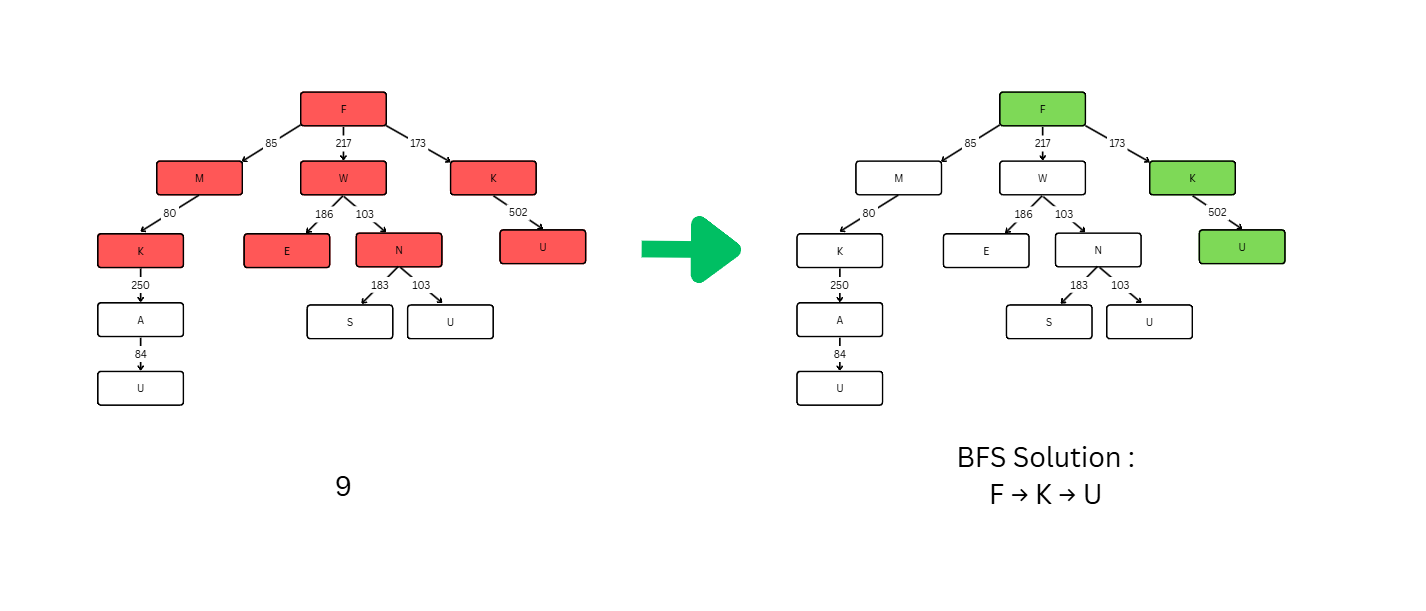

In [27]:
graph = {
    'F': ['M', 'W', 'K'],
    'M': ['R'],        # M = Mannheim → Karlsruhe
    'R': ['A'],        # R = Karlsruhe → Augsburg
    'A': ['U'],        # A = Augsburg → München
    'W': ['E', 'N'],   # W = Würzburg → Erfurt, Nümberg
    'E': [],           # E = Erfurt
    'N': ['U', 'S'],   # N = Nümberg → München, Stuttgart
    'K': ['U'],        # K = Kassel → München
    'U': [],           # U = München
    'S': []            # S = Stuttgart
}
visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0)
    print (m, end = " ")

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, 'F')    # function calling

Following is the Breadth-First Search
F M W K R E N U A S 

In [ ]:
graph = {
    'F': ['M', 'W', 'K'],
    'M': ['R'],        # M = Mannheim → Karlsruhe
    'R': ['A'],        # R = Karlsruhe → Augsburg
    'A': ['U'],        # A = Augsburg → München
    'W': ['E', 'N'],   # W = Würzburg → Erfurt, Nümberg
    'E': [],           # E = Erfurt
    'N': ['U', 'S'],   # N = Nümberg → München, Stuttgart
    'K': ['U'],        # K = Kassel → München
    'U': [],           # U = München
    'S': []            # S = Stuttgart
}

def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = [(start, [start])]  # (node, path_so_far)

    while queue:
        (node, path) = queue.pop(0)
        if node == goal:
            return path
        if node not in visited:
            visited.add(node)
            for neighbour in graph[node]:
                if neighbour not in visited:
                    queue.append((neighbour, path + [neighbour]))
    return None

# เรียกใช้
start = 'F'
goal = 'U'

print("Optimal path from", start, "to", goal, ":")
path = bfs_shortest_path(graph, start, goal)
if path:
    print(" → ".join(path))
else:
    print("No path found.")


Optimal path from F to U :
F → K → U


## Depth First Search

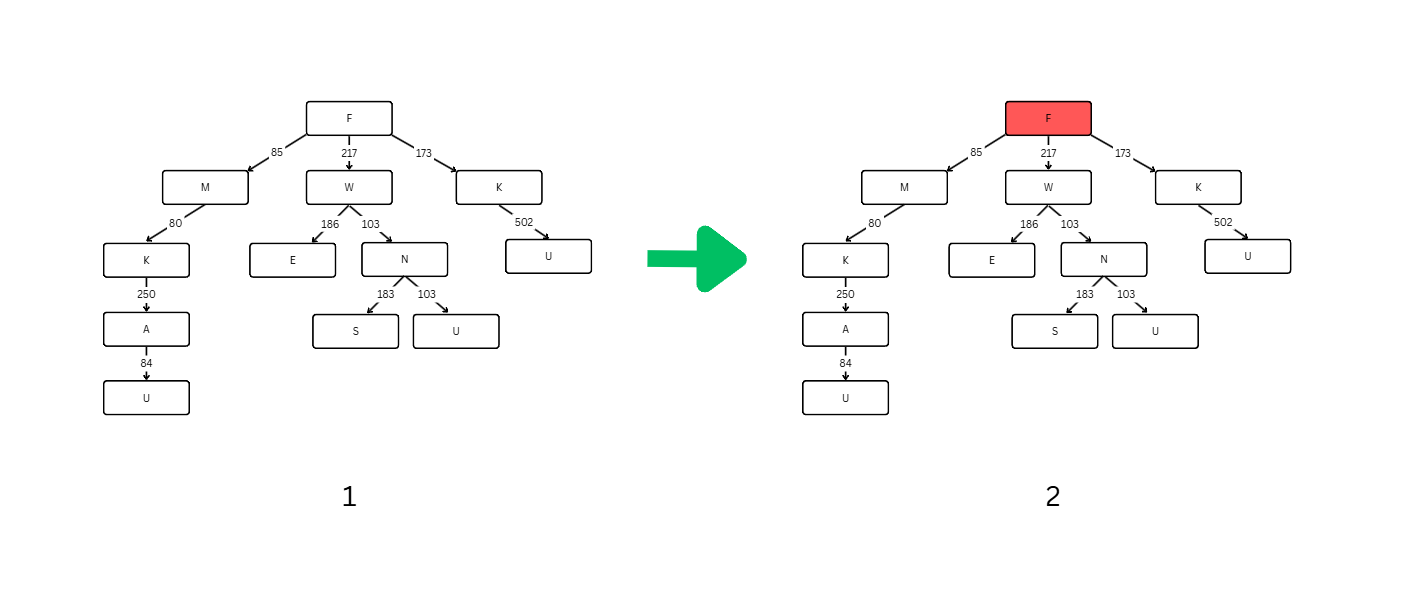

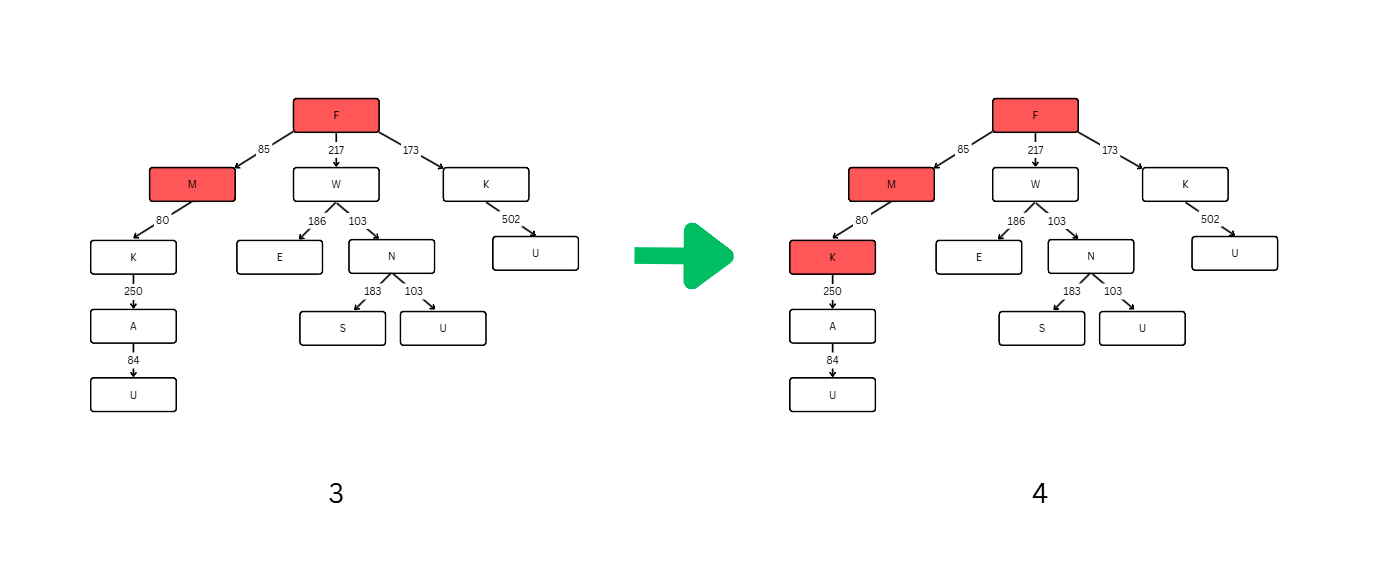

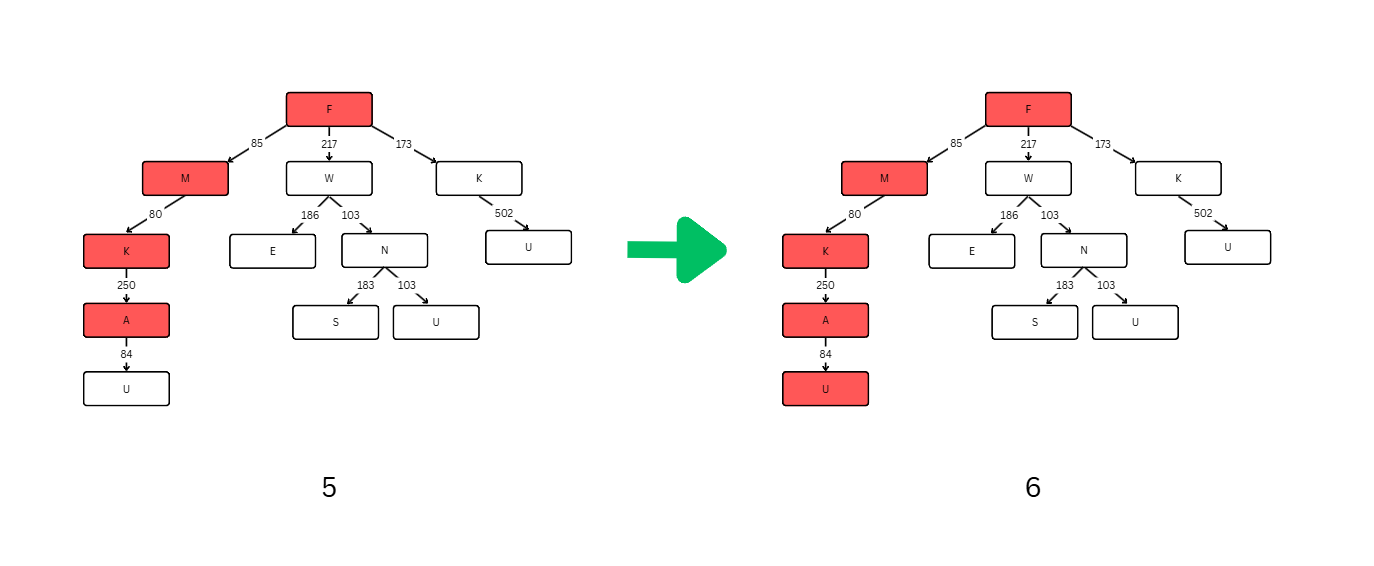

In [23]:
graph = {
    'F': ['M', 'W', 'K'],
    'M': ['R'],        # M = Mannheim → Karlsruhe
    'R': ['A'],        # R = Karlsruhe → Augsburg
    'A': ['U'],        # A = Augsburg → München
    'W': ['E', 'N'],   # W = Würzburg → Erfurt, Nümberg
    'E': [],           # E = Erfurt
    'N': ['U', 'S'],   # N = Nümberg → München, Stuttgart
    'K': ['U'],        # K = Kassel → München
    'U': [],           # U = München
    'S': []            # S = Stuttgart
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, 'F')


def dfs_path(graph, start, goal, path=None, visited=None):
    if visited is None:
        visited = set()
    if path is None:
        path = [start]
    else:
        path = path + [start]

    visited.add(start)

    if start == goal:
        return path

    for neighbour in graph[start]:
        if neighbour not in visited:
            result = dfs_path(graph, neighbour, goal, path, visited)
            if result:
                return result
    return None  # No path found

start = 'F'
goal = 'U'
print("DFS path from", start, "to", goal, ":")
path = dfs_path(graph, start, goal)
if path:
    print(" → ".join(path))
else:
    print("No path found.")


Following is the Depth-First Search
F
M
R
A
U
W
E
N
S
K
DFS path from F to U :
F → M → R → A → U


## Uniform Cost Search

Least cost path from F to U: F -> W -> N -> U with total cost 423


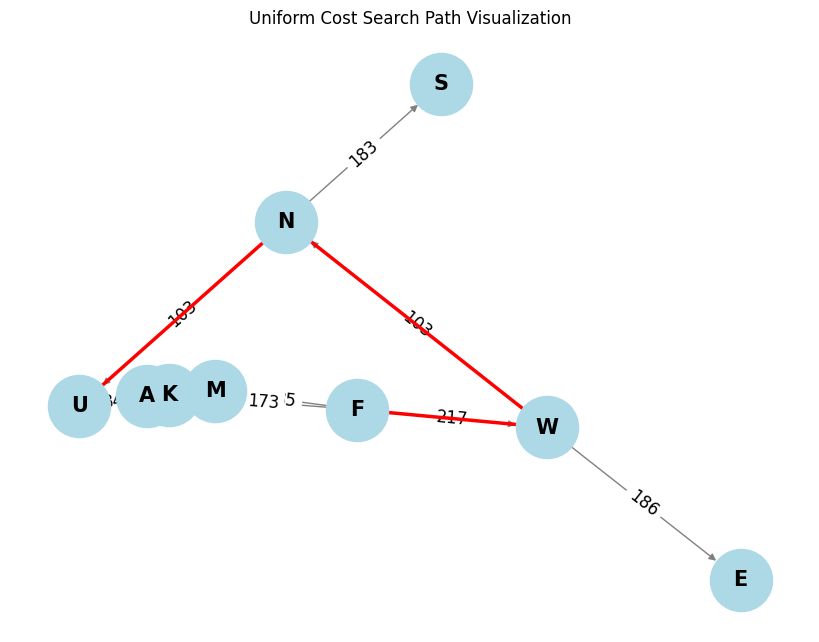

In [26]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    # Priority queue to store the frontier nodes, initialized with the start node
    priority_queue = [(0, start)]
    # Dictionary to store the cost of the shortest path to each node
    visited = {start: (0, None)}

    while priority_queue:
        # Pop the node with the lowest cost from the priority queue
        current_cost, current_node = heapq.heappop(priority_queue)

        # If we reached the goal, return the total cost and the path
        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)

        # Explore the neighbors
        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            # Check if this path to the neighbor is better than any previously found
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))

    # If the goal is not reachable, return None
    return None

def reconstruct_path(visited, start, goal):
    # Reconstruct the path from start to goal by following the visited nodes
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1]  # Get the parent node
    path.reverse()
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    # Adding nodes and edges to the graph
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)  # Positioning the nodes

    # Drawing the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    if path:
        # Highlight the path in red
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title("Uniform Cost Search Path Visualization")
    plt.show()

# Example graph represented as an adjacency list
graph = {
    'F' : [('M', 85),('W', 217),('K', 173)],
  'M' : [('K', 80)],
  'K' : [('A', 250)],
  'A' : [('U', 84)],
  'W' : [('E', 186),('N', 103)],
  'E' : [],
  'N' : [('U', 103),('S', 183)],
  'K' : [('U', 502)],
  'U' : [],
  'S' : []
}

# Example usage of the UCS function
start_node = 'F'
goal_node = 'U'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
    visualize_graph(graph, path)
else:
    print(f"No path found from {start_node} to {goal_node}")